In [141]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [142]:
df = pd.read_csv('data.csv')

In [143]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [144]:
sigmoid = lambda x :  np.exp(x)/(1+np.exp(x))
score = lambda bias, weights, features : np.dot(weights,features).sum() + bias
prediction = lambda bias, weights, features : sigmoid(score(bias,weights,features))
def logLoss(bias,weights,features,label):
    h = prediction(bias,weights,features)
    return -label*np.log(h) - ((1-label)*np.log(1- h))

def totalLogLoss(bias,weights,features,labels):
    totalError = 0
    for i in range(len(features)):
        totalError+= logLoss(bias,weights,features.iloc[i],labels.iloc[i])
    return totalError

In [145]:
def logistic_shift(bias,weights,features,y, n):
    h = prediction(bias,weights,features)
    for i in range(len(weights)):
        weights[i] += (n*(y-h)*features[i])
    bias += n*(y-h)
    return bias,weights

In [146]:
def logistic_regression_algo(features,labels, n, epochs):
    weights = np.zeros(len(features.columns))
    bias = 0
    errors = []
    w =[]
    w1, w2 =[], []
    for _ in range(epochs):
        p = random.randint(0,len(features)-1)
        bias, weights = logistic_shift(bias,weights,features.iloc[p],labels.iloc[p], n)
        errors.append(totalLogLoss(bias,weights,features,labels))
        if len(weights) == 2:
            w1+=[weights[0]]
            w2+=[weights[1]]
        else:
            w += [weights[0]]
    
    %matplotlib inline
    if len(weights)==2:
        plt.scatter(x=w1,y=errors, color='k')
        plt.scatter(x=w2,y=errors, color='b')
    else: 
        plt.scatter(x=w,y=errors, color='k')
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.show()
    return bias,weights

In [147]:
def testRun(X,y,vals):
    Error = []
    pred = []
    wrong = 0
    for i in range(len(X)):
        h = float(prediction(vals[0],vals[1], X.iloc[i]))
        pred+=[h]
        p=0
        if h>=0.5:
            p=1
        else:
            p=0
        if p == float(y.iloc[i]):
            Error+=[0]
        else:
            Error+=[np.abs(h-y.iloc[i])]
            wrong += 1
    plt.scatter(x = range(X.shape[0]), y = Error)
    plt.xlabel('Test')
    plt.ylabel('Error')
    plt.show()
    return (len(X)-wrong)/len(X)

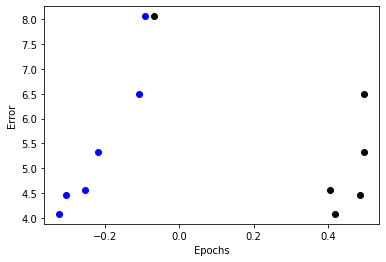

(-0.07637113623755462, array([ 0.48508756, -0.30622914]))


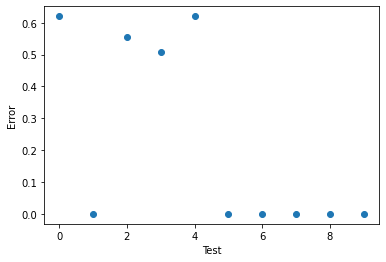

0.6


In [148]:
vals = logistic_regression_algo(X,y,0.1,6)
print(vals)
acc =testRun(X, y, vals)
print(acc)

In [149]:
print(vals)

(-0.07637113623755462, array([ 0.48508756, -0.30622914]))


In [150]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=6).fit(X, y)
print(clf.predict(X), np.array(y))

[0 0 0 0 0 1 1 1 1 1] [0 0 0 0 0 1 1 1 1 1]


/home/student/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [151]:
clf.coef_

array([[ 0.83230211, -1.16942664]])

In [152]:
X = pd.DataFrame(df.iloc[:,0])
y = pd.DataFrame(df.iloc[:,-1])
print(type(X))

<class 'pandas.core.frame.DataFrame'>


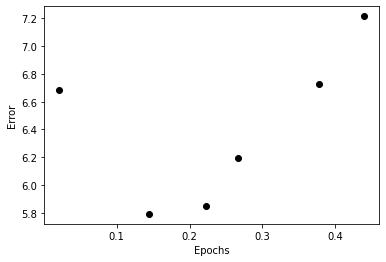

/home/student/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2830: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  order=order, subok=True, ndmin=ndmin)


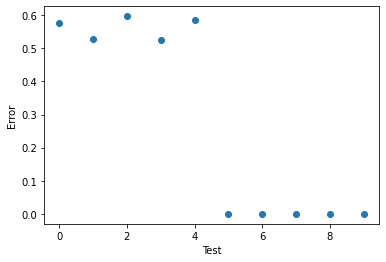

0.5


In [153]:
vals = logistic_regression_algo(X,y,0.1,6)
acc =testRun(X, y, vals)
print(acc)

(Y   -0.015008
Name: 4, dtype: float64, array([0.41618075]))
